# Importing libraries

In [82]:
# importing pandas and seaborn libraries as pd and sns
import pandas as pd
import seaborn as sns
import regex as re
import nltk

# Opens the CSV file

In [83]:
#creating a dataframe
file="C:\\Users\\Ramachandraiah\\Downloads\\good_reads_top_1000_books.csv"
df = pd.read_csv(file)
df

,Book Name,Author,Average Rating,Number of Ratings,Score on Goodreads
0,To Kill a Mockingbird,Harper Lee,4.26,6129090,17358.0
1,1984,George Orwell,4.19,4604557,15474.0
2,Pride and Prejudice,Jane Austen,4.29,4273146,15135.0
3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,4.47,10063128,12440.0
4,The Great Gatsby,F. Scott Fitzgerald,3.93,5244056,10828.0
...,...,...,...,...,...
1012,The Old Men at the Zoo,Angus Wilson,3.35,126,3.0
1013,"The Case of the Gilded Fly (Gervase Fen, #1)",Edmund Crispin,3.52,3251,3.0
1014,The Swimming-Pool Library,Alan Hollinghurst,3.73,10238,3.0
1015,A Dark-Adapted Eye,Barbara Vine,3.93,9616,2.0


In [84]:
#displaying first 20 of a dataframe
df.head(20)

,Book Name,Author,Average Rating,Number of Ratings,Score on Goodreads
0,To Kill a Mockingbird,Harper Lee,4.26,6129090,17358.0
1,1984,George Orwell,4.19,4604557,15474.0
2,Pride and Prejudice,Jane Austen,4.29,4273146,15135.0
3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,4.47,10063128,12440.0
4,The Great Gatsby,F. Scott Fitzgerald,3.93,5244056,10828.0
5,Jane Eyre,Charlotte Brontë,4.15,2095866,10613.0
6,Lord of the Flies,William Golding,3.69,2906413,10098.0
7,Alice’s Adventures in Wonderland / Through the...,Lewis Carroll,4.06,564072,9225.0
8,The Lord of the Rings,J.R.R. Tolkien,4.53,676596,9201.0
9,"The Hobbit (The Lord of the Rings, #0)",J.R.R. Tolkien,4.29,3977772,9013.0


# Sample fraction

In [85]:
#displaying the dimensions of dataframe
#df=df.sample(frac=0.2)
df.shape

(1017, 5)

# Overview of a dataframe

In [86]:
df.columns #displaying column names
df.dtypes #displaying datatype of each column
df.info() #creating the dataframe info
df.describe() #displaying the description of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Book Name           1017 non-null   object 
 1   Author              1017 non-null   object 
 2   Average Rating      1017 non-null   float64
 3   Number of Ratings   1017 non-null   int64  
 4   Score on Goodreads  1017 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 39.9+ KB


,Average Rating,Number of Ratings,Score on Goodreads
count,1017.000000,1.017000e+03,1017.000000
mean,3.867099,1.695201e+05,667.055064
std,0.254757,5.889344e+05,1639.846128
min,2.710000,1.500000e+01,1.000000
25%,3.730000,4.131000e+03,67.000000
50%,3.880000,1.584800e+04,136.000000
75%,4.040000,8.608300e+04,457.000000
max,4.600000,1.006313e+07,17358.000000


# Length of speeches

In [87]:
df['length'] = df['Book Name'].str.len() #displaying a new column  as length
df.describe()# displayig describe of dataframe

,Average Rating,Number of Ratings,Score on Goodreads,length
count,1017.000000,1.017000e+03,1017.000000,1017.000000
mean,3.867099,1.695201e+05,667.055064,21.788594
std,0.254757,5.889344e+05,1639.846128,12.837627
min,2.710000,1.500000e+01,1.000000,1.000000
25%,3.730000,4.131000e+03,67.000000,13.000000
50%,3.880000,1.584800e+04,136.000000,19.000000
75%,4.040000,8.608300e+04,457.000000,27.000000
max,4.600000,1.006313e+07,17358.000000,110.000000


# Stats about text fields

In [88]:
df.describe(include='O') #desplaying categorical columns in a dataframe

,Book Name,Author
count,1017,1017
unique,1017,685
top,To Kill a Mockingbird,Charles Dickens
freq,1,9


# Check for missing data

In [89]:
df.isna().sum()#finding missing values of each column of dataframe

Book Name             0
Author                0
Average Rating        0
Number of Ratings     0
Score on Goodreads    0
length                0
dtype: int64

# Problem with Author

In [90]:
df[df['Author'].str.contains('Barbara Vine')]

,Book Name,Author,Average Rating,Number of Ratings,Score on Goodreads,length
584,King Solomon's Carpet,Barbara Vine,3.73,1987,100.0,21
1015,A Dark-Adapted Eye,Barbara Vine,3.93,9616,2.0,18
1016,A Fatal Inversion,Barbara Vine,3.94,4491,1.0,17


# Charts

<Axes: >

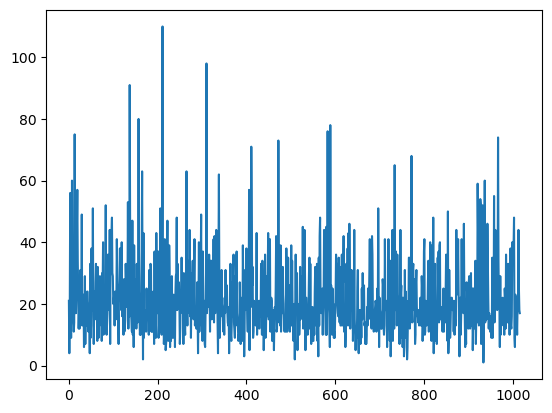

In [91]:
df['length'].plot() # plotting graph for length column

<Axes: >

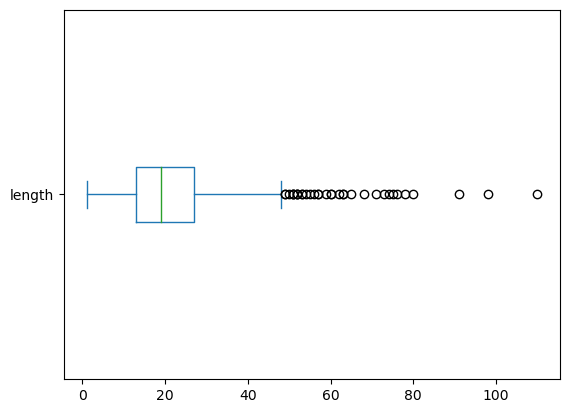

In [92]:
df['length'].plot(kind='box', vert=False) #creating a horizontal boxplot for length column 

# Histogram

<Axes: ylabel='Frequency'>

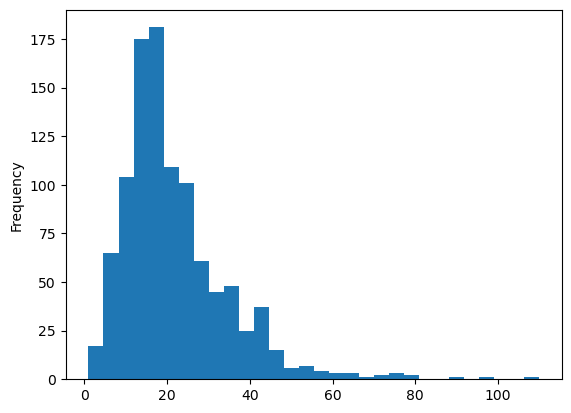

In [93]:
df['length'].plot(kind='hist', bins=30) #finding histogram for length column with 30 bins

# Barplot

C:\Users\Ramachandraiah\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


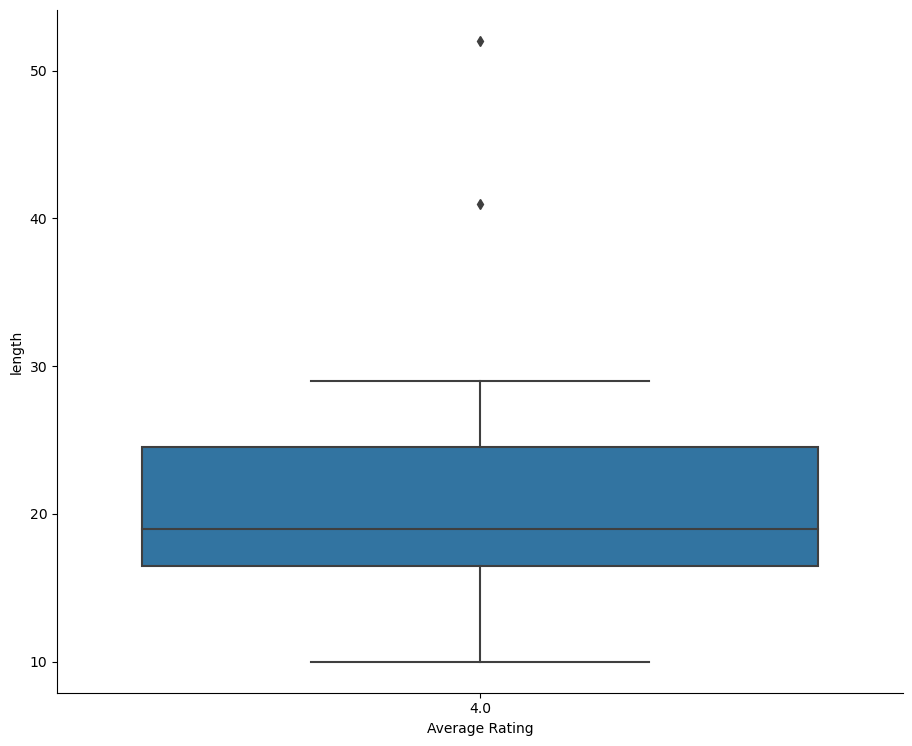

In [94]:
where = df['Average Rating'].isin([1, 2, 3, 4, 5]) #filtering rows based on country

g = sns.catplot(data=df[where], x="Average Rating", y="length", kind='box') #generating box plot
g.fig.set_size_inches(10, 8) #setting figure size

In [95]:
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

In [96]:
testtext ="Let's work together to beat SARS-CoV-2 in 2020! Learn more and take action at www.cdc.gov." #sample text
testtokens = tokenize(testtext) #by using tokenize function tokenize sample text
print(testtokens) #printing the list of testtokens

['Let', 's', 'work', 'together', 'to', 'beat', 'SARS-CoV-2', 'in', 'Learn', 'more', 'and', 'take', 'action', 'at', 'www', 'cdc', 'gov']


In [97]:
nltk.download('stopwords') #downloading the stopwords from nltk
stopwords = set(nltk.corpus.stopwords.words('english')) # Get the list of English stopwords and arrange them in a list.
print(stopwords) #printing the output of stopwords

{"shan't", 'most', 'nor', 'during', 'it', 'themselves', 'which', 'until', "aren't", "hasn't", 'his', 'the', 'above', 'of', 'your', 'mustn', 'haven', 'both', "don't", 'she', 'them', 'had', 'was', 'am', 'under', 'all', 'any', 'once', 'again', 'same', 'over', 'herself', 'few', 'as', "wasn't", 'their', 'have', 'be', 'against', "isn't", 'being', 'or', "mustn't", 'if', 'll', 'i', 'has', 'my', 'myself', 'shouldn', 'not', 're', 'd', 'for', 'each', 'who', 'ours', "you're", 'yourself', 'than', 'y', 'isn', 'should', 'what', 'been', 'and', "should've", 'up', 'from', 'out', 'such', 'now', 'having', 'didn', 'down', 'wasn', 'where', 'about', "didn't", 'so', 'hers', 'a', 'doesn', 'by', 'were', 'shan', 'below', 'this', 'further', 'how', 'no', 'but', 'we', 'more', 'you', 'then', 'through', "weren't", 'own', 'very', 'ma', 'with', 'are', "doesn't", "she's", 'm', 'mightn', 'before', "wouldn't", 'hasn', "you'll", 'into', 'her', 'these', 'whom', 'o', 'on', 's', 've', "couldn't", 'to', 'some', "shouldn't", 'h

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ramachandraiah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Function to remove Stop words

In [98]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in     # Removing stopwords from the list of tokens

            stopwords]
cleantokens= remove_stop(testtokens) # Testing the remove_stop function with testtokens
print(cleantokens)

['Let', 'work', 'together', 'beat', 'SARS-CoV-2', 'Learn', 'take', 'action', 'www', 'cdc', 'gov']


# Make a Pipeline

In [99]:
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline): #Set the input text as the token's initial value.
    tokens = text  # Apply each function in the pipeline to the tokens
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens #returns the tokens

# Run the pipeline

In [100]:
# Runing the pipeline
df['tokens'] = df['Book Name'].apply(prepare, pipeline=pipeline)

# count the tokens

In [101]:
df['num_tokens'] = df['tokens'].map(len)

In [102]:
df.tail() #displays last five of a dataframe

,Book Name,Author,Average Rating,Number of Ratings,Score on Goodreads,length,tokens,num_tokens
1012,The Old Men at the Zoo,Angus Wilson,3.35,126,3.0,22,"[old, men, zoo]",3
1013,"The Case of the Gilded Fly (Gervase Fen, #1)",Edmund Crispin,3.52,3251,3.0,44,"[case, gilded, fly, gervase, fen]",5
1014,The Swimming-Pool Library,Alan Hollinghurst,3.73,10238,3.0,25,"[swimming-pool, library]",2
1015,A Dark-Adapted Eye,Barbara Vine,3.93,9616,2.0,18,"[dark-adapted, eye]",2
1016,A Fatal Inversion,Barbara Vine,3.94,4491,1.0,17,"[fatal, inversion]",2


# Using the counter

In [103]:
from collections import Counter
tokens = tokenize("He loves my cooking, and my cooking loves my new kitchen.") #tokenize the input string 
testcount= Counter(tokens) #counting frequency of each token
print(testcount) #printing the token frequencies

Counter({'my': 3, 'loves': 2, 'cooking': 2, 'He': 1, 'and': 1, 'new': 1, 'kitchen': 1})


# Current count

In [104]:
more_tokens = tokenize("She likes dogs and cats.")
testcount.update(more_tokens) #updating token frequency with new tokens
print(testcount) #printing the updating token

Counter({'my': 3, 'loves': 2, 'cooking': 2, 'and': 2, 'He': 1, 'new': 1, 'kitchen': 1, 'She': 1, 'likes': 1, 'dogs': 1, 'cats': 1})


In [105]:
counter = Counter() #intializing counter object
df['tokens'].map(counter.update) # Update the Counter with token frequencies column in the DataFrame
print(counter.most_common(5))#printing 5most common tokens

[('man', 21), ('love', 17), ('trilogy', 17), ('time', 14), ('new', 12)]


# Word frequency in its own dataframe

In [106]:
freq_df = pd.DataFrame.from_dict(counter,
orient='index', columns=['freq']) #converting counter object to dataframe
freq_df = freq_df.query('freq >= 1') #filtering tokens with frequency less than equal to 1
freq_df.index.name = 'token' #set index name dataframe to 'token'

# Sort and Display

In [107]:
freq_df = freq_df.sort_values('freq', ascending=False) #sort the dataframe to descending order
freq_df.head(10) #displaying top 10 frequencies

,freq
token,
man,21
love,17
trilogy,17
time,14
new,12
death,11
adventures,11
men,10
history,10


# Stats

In [108]:
freq_df.describe() #creating frequency distribution's descriptive statistics.

,freq
count,1647.000000
mean,1.510625
std,1.469736
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,21.000000


# Bar Chart

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

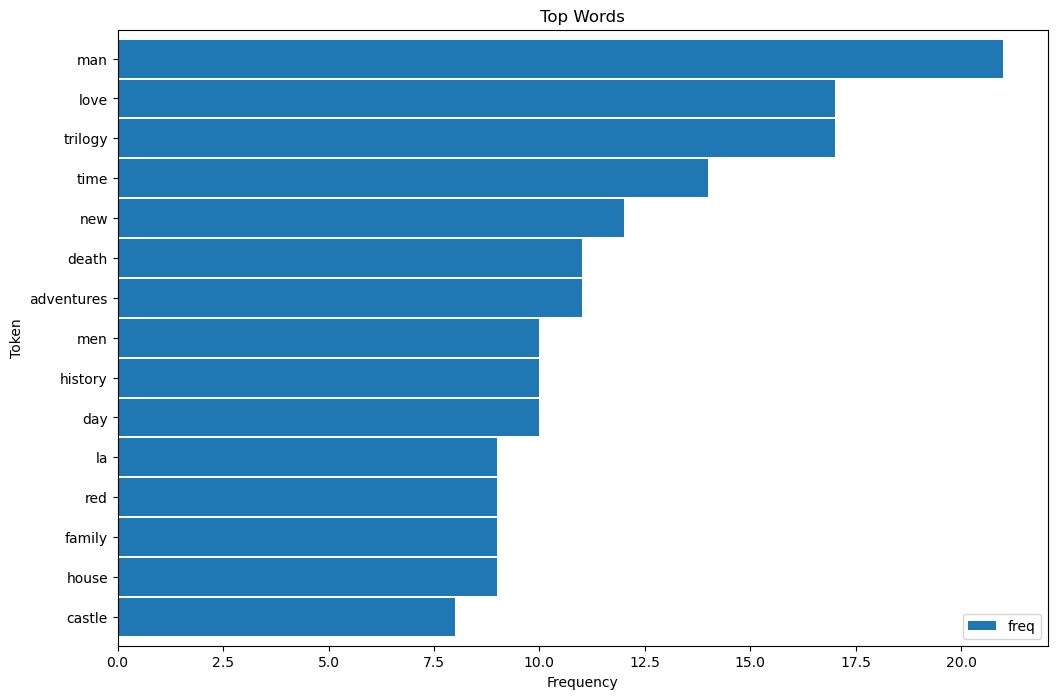

In [109]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8)) #plot top 15 most frequency tokens
ax.invert_yaxis() # Invert the y-axis to display the most frequent tokens 
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')# Set the labels and title for the plot

# Installing wordcloud

In [114]:
pip install wordcloud #installing wordcloud package using pip

Note: you may need to restart the kernel to use updated packages.


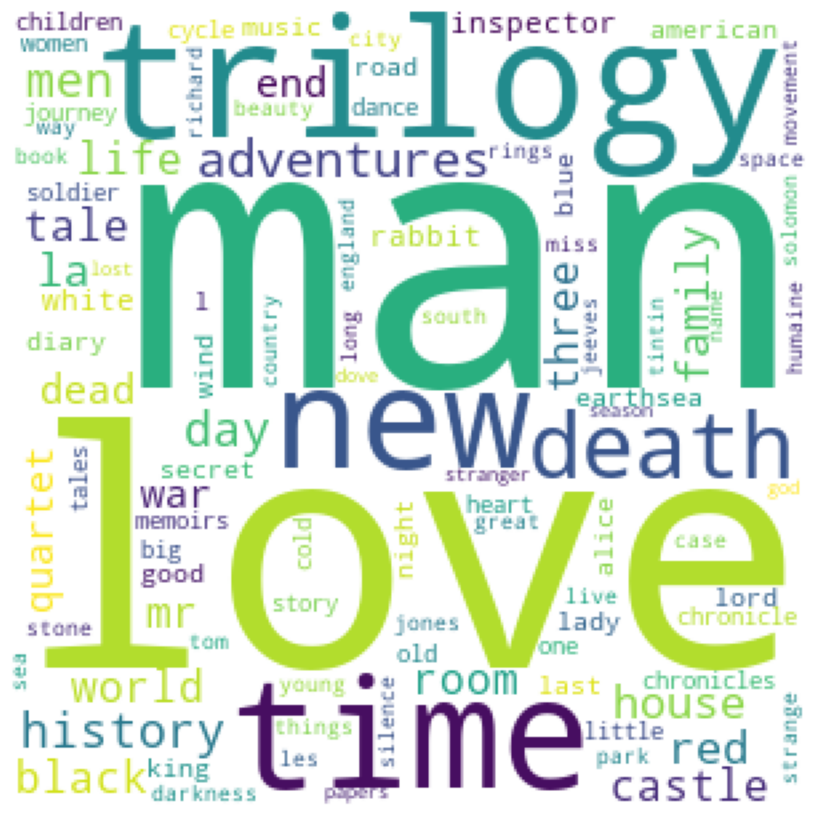

In [116]:
wc = WordCloud(background_color='white', width = 300, height=300,max_words=100, margin=2) #creating wordcloud object using specific parameters
wc.fit_words(freq_df['freq'].to_dict() ) # Fit the word frequencies to the WordCloud object
plt.figure(figsize = (8, 8), facecolor = None) # Setting the figure size and background color
plt.imshow(wc) # Display the word cloud using matplotlib
plt.axis("off") # turn off the axis
plt.tight_layout(pad = 0) # adjust the layout
plt.show() # show the plot